#  Notebook 5C. Multiple outputs NN and general notes on tuning NN parameters

Author: Christopher Monterola

Copyright © 2021 Christopher Monterola. All rights reserved.

This notebook is being written as part of a book on Deep Learning. None of the content here shall be reproduced and/or distributed without the written permission of the author. 

---

## Executive Summary

Here, we consider the case of a three layer feedforward neural network (input layer, single hidden layer, output layer) where you have $P$ outputs, 

![feedforwardNN_manyoutputs2](https://user-images.githubusercontent.com/25600601/138560327-40dba0e0-dd06-4760-9313-1736371df98e.png)

We also introduce in this notebook the utilization of NN as a regressor. We then end by demonstrating that NN can generalize the derivative formulation from limited examples. 



#1.  Training Steps

Training proceeds similarly with the single output, it will be straightforward but more rigorous because of the double summation of weights on the output layer.


**Forward Propagation** The mapping from the feature $x_1, x2, ... x_N$  to the outputs $\Psi_{NN}^1, \Psi_{NN}^2, ... \Psi_{NN}^P$ can be written in the following steps:




STEP 1: Input to $j$-th hidden node

\begin{equation}
\Phi_j= g(\sum_{i=1}^N f(x_i)w_{ij})
\end{equation}

where g(x) is the hidden activation function, $\Phi_j$ is the output of $j$th hidden node ($j = 1,2 ..., H$) and $N$ is the total number of input nodes.

STEP 2: Hidden to $k$-th Output node

\begin{equation}
\Psi_{NN}^k= h(\sum_{j=1}^H  v_{jk} \Phi_j)
\end{equation}

where h(x) is the activation function of the output node, and $\Psi_{NN}^k$ is the $k$-th output where $k = 1,2 ..., P$ and $P$ is the total number of output nodes.

**Backpropagation** As before the goal is to find the value of the weights $w_{ij}$ and $v_j$ that will reduce the error given by:

\begin{equation}
E=\frac{1}{2} \sum_{k=1}^P (\Psi_{NN}^k - \Psi_{actual}^k)^2
\end{equation}

and this is achieved via gradient descent method by updating the weights from hidden to output nodes by:

\begin{equation}
v_{jk}^{t+1} = v_{jk}^t - \gamma_2 \frac{\partial E}{\partial v_{jk}^t} 
\end{equation}

while for the input to hidden nodes, 

\begin{equation}
w_{ij}^{t+1} = w_{ij}^t - \gamma_1 \frac{\partial E}{\partial w_{ij}^t} 
\end{equation}

where $\gamma_1$ and $\gamma_2$ are the learning rates input to hidden and hidden to output layers, respectively.

Further, the above gradients can be obtained by using implementing the *chain rule* that will result to the following:

**Hidden to output**

\begin{equation}
\frac{\partial E}{\partial v_{jk}^t} = (\Psi_{NN}^k - \Psi_{actual}^k) \frac{\partial \Psi_{NN}^k }{\partial v_{jk}^t} \\
\frac{\partial E}{\partial v_{jk}^t}  =(\Psi_{NN}^k - \Psi_{actual}^k) h'(\sum_{j=1}^H  v_{jk} \Phi_j)\Phi_j 
\end{equation}


If we define the the layer 2 gradient (or layer 2 delta = $\Delta \Phi$) as 

\begin{equation}
\Delta\Phi =(\Psi_{NN}^k - \Psi_{actual}^k) h'(\sum_{j=1}^H  v_{jk} \Phi_j)
\end{equation}

that is, we write $\Delta\Phi_2$ as the layer 2 error $\times$ derivative of layer 2 output, we can then rewrite $\frac{\partial E}{\partial v_{jk}^t}$ as:

\begin{equation}
\frac{\partial E}{\partial v_{jk}^t}  =\Delta\Phi_2 \Phi_j 
\end{equation}

then the weight change rule from hidden to output is given by: 

\begin{equation}
v_{jk}^{t+1} = v_{jk}^t - \gamma_2 \Delta\Phi_2 \Phi_j 
\end{equation}

**Input to Hidden**

\begin{equation}
\frac{\partial E}{\partial w_{ij}^t} = (\Psi_{NN}^k - \Psi_{actual}^k) \frac{\partial \Psi_{NN} }{\partial w_{ij}^t} \\
\frac{\partial E}{\partial w_{ij}^t}  =(\Psi_{NN}^k - \Psi_{actual}^k) h'( \sum_{j=1}^H v_{jk} \Phi_j) (v_{jk} \frac{\partial \Phi_j}{\partial w_{ij}^t})
\\
\frac{\partial E}{\partial w_{ij}^t} =  (\Psi_{NN}^k - \Psi_{actual}^k) h'( \sum_{j=1}^H v_{jk} \Phi_j) (v_{jk} g'(\sum_{i=1}^N f(x_i)w_{ij})) (f(x_i))
\end{equation}

Using the expression for $\Delta\Phi$, we can rewrite the result as 

\begin{equation}
\frac{\partial E}{\partial w_{ij}^t} =  \Delta\Phi_2 (v_{jk} g'(\sum_{i=1}^N f(x_i)w_{ij})) (f(x_i)) =\Delta\Phi_1 f(x_i)
\end{equation}

Note we can express layer 1 delta $\Delta\Phi_1$ similar to: layer 2 delta $\times$ weight from hidden to output $\times$ derivative of layer 1 output, or:  

\begin{equation}
\frac{\partial E}{\partial w_{ij}^t} =  \Delta\Phi_1 f(x_i)
\end{equation}

hence,

\begin{equation}
w_{ij}^{t+1} = w_{ij}^t - \gamma_1 \Delta\Phi_1 f(x_i)
\end{equation}

 

#Example 1. Implement *OR, AND, XOR, simultaneously in one NN

| $x_1$ | $x_2$ | $\Psi_{actual}^1=AND$ | $\Psi_{actual}^2=OR$ |$\Psi_{actual}^3=XOR$ |$\Psi_{actual}^3=XNOR$ |
| --- | --- | --- | --- |--- |--- |
|-1 | -1 | 0 | 0 |0 | 1|
|-1 | 1 |  0|  1 |1 | 0|
| 1 | -1 | 0 | 1 |1 |0|
| 1 | 1 | 1 |  1 |0 |1|


In [1]:
import numpy as np

gamma1=.01 #Input to Hidden ----> Rule of thumb: Larger
gamma2=.001 #Hidden to Output ---> Rule of thumb: Smaller

no_inputs=3
no_hidden=3  #No of hidden nodes
no_outputs=4 

def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid

def nonlin2(x,deriv=False):
    sin=np.sin(x)
    if(deriv==True):
        return np.cos(x)
    return sigmoid
    
X = np.array([  [1,-1,-1],
                [1,-1,1],
                [1,1,-1],
                [1, 1,1] ])

y = np.array([[0,0,0,1],[0,1,1,1],[0,1,1,0],[1,0,0,1]]).T

np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,no_outputs)) - 1


print(w0)

for iter in range(100000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    
    if (iter% 10000) == 0:
        print ("Error =", np.mean(np.abs(layer2_error)))
        
 #Gradients
    layer2_delta = layer2_error*nonlin(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w1 += gamma1*layer1.T.dot(layer2_delta)
    w0 += gamma2*layer0.T.dot(layer1_delta)

print ("\n Actual NN Output After Training:")
print (layer2)    
    
print ("\n Actual NN Output Converted to Integer After Training:")
print (np.rint(layer2))

print ("\n Theoretical Result:")
print (y)

[[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]
 [-0.88383278  0.73235229  0.20223002]]
Error = 0.5193505319611598
Error = 0.39709469222813354
Error = 0.3019512452027129
Error = 0.23402131080258726
Error = 0.12837116899174184
Error = 0.08454343897212958
Error = 0.06545860443639213
Error = 0.05474818963077635
Error = 0.04777857994317368
Error = 0.042815436678721085

 Actual NN Output After Training:
[[1.21444994e-05 3.18617304e-02 5.41312954e-02 9.45836686e-01]
 [2.63439804e-02 9.73351823e-01 9.49246938e-01 5.07846179e-02]
 [2.54539154e-02 9.68299940e-01 9.49660600e-01 5.03708139e-02]
 [9.57616930e-01 9.97657147e-01 6.38518975e-02 9.36111683e-01]]

 Actual NN Output Converted to Integer After Training:
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]

 Theoretical Result:
[[0 0 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [1 1 0 1]]


### <span style="color:green"> Break out Rooms. Discuss the above results per Learning Team. Share any new findings. (15 mins) </span> 

# Example 2. From above, Implement a backpropagation with more hidden layers, say from 1 to 2.

In [2]:
import numpy as np

gamma0=.1 #Input to Hidden1
gamma1=.1 #Hidden1 to Hidden2
gamma2=.01 #Hidden2 to Output

no_inputs=3
no_hidden=4  #No of hidden nodes
no_hidden2=3  #No of hidden nodes for second layer
no_outputs=4 

def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid

def nonlin2(x,deriv=False):
    sin=np.sin(x)
    if(deriv==True):
        return np.cos(x)
    return sigmoid
    
X = np.array([  [1,-1,-1],
                [1,-1,1],
                [1,1,-1],
                [1, 1,1] ])

y = np.array([[0,0,0,1],[0,1,1,1],[0,1,1,0],[1,0,0,1]]).T

np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,no_hidden2)) - 1
w2 = 2*np.random.random((no_hidden2,no_outputs)) - 1


print(w0)

for iter in range(100000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))
    layer3 = nonlin(np.dot(layer2,w2))

    # Error Function
    layer3_error = y - layer3
    
    if (iter% 10000) == 0:
        print ("Error =", np.mean(np.abs(layer3_error)))
        
 #Gradients

    layer3_delta = layer3_error*nonlin(np.dot(layer2,w2),deriv=True)
    layer2_delta = layer3_delta.dot(w2.T)*nonlin(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w2 += gamma2*layer2.T.dot(layer3_delta)
    w1 += gamma1*layer1.T.dot(layer2_delta)
    w0 += gamma0*layer0.T.dot(layer1_delta)

print ("\n Actual NN Output After Training:")
print (layer3)    
    
print ("\n Actual NN Output Converted to Integer After Training:")
print (np.rint(layer3))

print ("\n Theoretical Result:")
print (y)

[[-0.25091976  0.90142861  0.46398788  0.19731697]
 [-0.68796272 -0.68801096 -0.88383278  0.73235229]
 [ 0.20223002  0.41614516 -0.95883101  0.9398197 ]]
Error = 0.47943891014900886
Error = 0.10942848159399271
Error = 0.06600031677978843
Error = 0.051111532590924894
Error = 0.043058725905313774
Error = 0.037850775924042124
Error = 0.03413803855891985
Error = 0.03132297961308809
Error = 0.02909569674796545
Error = 0.02727759207535776

 Actual NN Output After Training:
[[0.00596608 0.03423469 0.0342354  0.96556907]
 [0.01571935 0.97045431 0.97041691 0.02975172]
 [0.01572476 0.97045484 0.97040113 0.02976757]
 [0.9763823  0.97781998 0.02406086 0.97583734]]

 Actual NN Output Converted to Integer After Training:
[[0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 1.]]

 Theoretical Result:
[[0 0 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [1 1 0 1]]


#2. Multiple Outputs Regressor

In our previous discussions, we have illustrated how to implement (1) a single output classifier (Supplementary A - OR, AND, XOR, symmetry problems, College Entrance test (UPCAT) prediction), (2) a multiple output classifier, (3) a single output regressor (i.e. bike ride sharing problem).

Here, we illustrate how to implement a **multiple output regressor** and use it to map functions (from identity mapping to derivatives to integration). The ability of the NN to map very complex relations as demonstrated here will give you a profound perspective on how powerful the gradient descent algorithm is. The evolution of AI somehow means engineers have found more use for the gradient descent algorithm, which was pioneerded by Isaac Newton about 3.5 centuries ago!


# Example 3.  Train the system to learn the derivatives of a function. 

Let the training functions be given by: $f(x) = .1 x^2$ and $g(x)=\sin(2x)$. The corresponding derivatives are: $f'(x) = .2 x$ and $g'(x)=2\cos(2x)$.

In [3]:
import numpy as np


def nonlin2(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid 

def nonlin(x,deriv=False):
    sigmoid=2*x
    if(deriv==True):
        return 2.0
    return sigmoid

'''def nonlin(x,deriv=False):
    sine=2*np.sin(x)
    if(deriv==True):
        return 2*np.cos(x)
    return sine'''

X = []
y = []

delx=.1

for start in np.arange(0,1,delx):
    rangex=np.arange(start, start+4.0, 0.1)
    #print(rangex)
    X.append(np.sin(2.0*rangex))
    y.append(2.0*np.cos(2.0*rangex))
    X.append(np.sin(1.0*rangex))
    y.append(1.0*np.cos(1.0*rangex))
    X.append(0.1*rangex*rangex)
    y.append(0.1*2.0*rangex)
    X.append(rangex)
    y.append(rangex**0)


X=np.array(X)
y=np.array(y)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1 )


print(y)

[[ 2.          1.96013316  1.84212199 ...  0.87709466  0.50251969
   0.10791084]
 [ 1.          0.99500417  0.98006658 ... -0.84810003 -0.79096771
  -0.7259323 ]
 [ 0.          0.02        0.04       ...  0.74        0.76
   0.78      ]
 ...
 [ 0.62160997  0.54030231  0.45359612 ... -0.11215253 -0.01238866
   0.08749898]
 [ 0.18        0.2         0.22       ...  0.92        0.94
   0.96      ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


In [4]:
y.shape

(40, 40)

In [5]:
gamma1=.001 #Input to hidden
gamma2=.001 #Hidden to input

no_inputs=len(X[0])
no_hidden=10  #No of hidden nodes
no_outputs=len(y[0])

np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,no_outputs)) - 1

#print(w0)
X=X_train
y=y_train


for iter in range(1000000):
    
    # Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin2(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    
    if (iter% 50000) == 0:
        print ("Error =", np.mean(np.abs(layer2_error)))
        
 #Gradients
    layer2_delta = layer2_error*nonlin(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin2(np.dot(layer0,w0),deriv=True)

    w1 += gamma1*layer1.T.dot(layer2_delta)
    w0 += gamma2*layer0.T.dot(layer1_delta)

#print ("\n Actual NN Output After Training:")
#print (layer2)    

#print ("\n Theoretical Result:")
#print (y)

Error = 2.1077835619527865
Error = 0.01096922127305201
Error = 0.007739288132099143
Error = 0.006211285594281941
Error = 0.0055215434454923855
Error = 0.00502603114723731
Error = 0.004609028307516739
Error = 0.0042578798328004284
Error = 0.003966079597229351
Error = 0.0037429913575583967
Error = 0.003581622120049478
Error = 0.0034784207380311343
Error = 0.0033951639499795487
Error = 0.0033262986749486726
Error = 0.0032624860286351413
Error = 0.003201982046953607
Error = 0.0031433262742983723
Error = 0.003085504723973063
Error = 0.0030295630394124216
Error = 0.0029752291769573522


Solid lines are the functions, dashed lines the derivatives, open circles the prediction


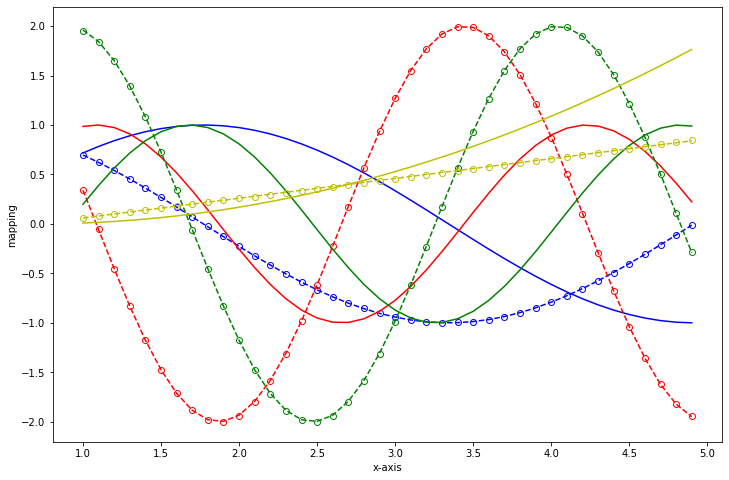

In [6]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,8))

print ("Solid lines are the functions, dashed lines the derivatives, open circles the prediction")

index=10
start=.1*index
rangex=np.arange(start, start+4.0, 0.1)
plt.plot(rangex, X[index],'b-')
plt.plot(rangex, y[index],'b--')
plt.plot(rangex, layer2[index], 'bo',mfc='none')

plt.plot(rangex, X[index+1],'r-')
plt.plot(rangex, y[index+1],'r--')
plt.plot(rangex, layer2[index+1], 'ro',mfc='none')

plt.plot(rangex, X[index+2],'g-')
plt.plot(rangex, y[index+2],'g--')
plt.plot(rangex, layer2[index+2], 'go',mfc='none')

plt.plot(rangex, X[index+3],'y-')
plt.plot(rangex, y[index+3],'y--')
plt.plot(rangex, layer2[index+3], 'yo',mfc='none')


plt.xlabel('x-axis')
plt.ylabel('mapping')
plt.axis('tight')
plt.show()

## Testing with other functions

**Note:** 
>The prediction of the model can generalize well only on functions that have derivative values of -2 to 2 as seen in the plot above. So if we try to test a function that has a derivate which can have values outside the -2 to 2 range, then the model will perform badly.

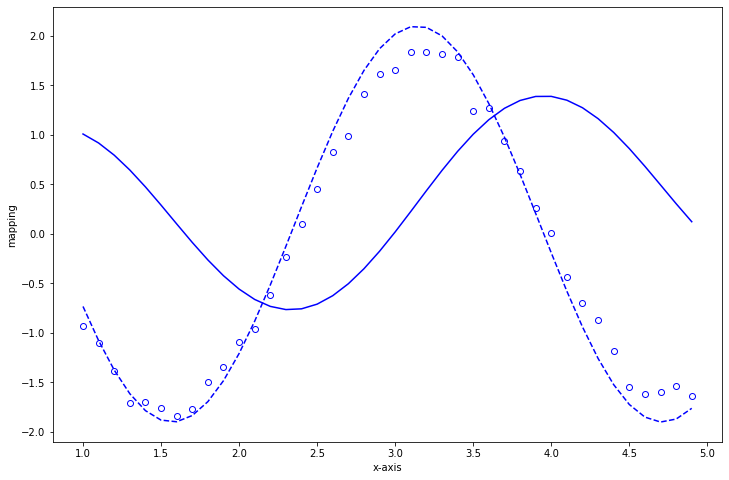

In [7]:
rangex=np.arange(start, start+4.0, 0.1)


X_test=np.sin(2.0*rangex) + 0.1*rangex
y_test=(2*np.cos(2.0*rangex))+ (0.1*rangex**0)
#X_test= .1*rangex*rangex 
#y_test=.2*rangex 

# Feed forward through layers 0, 1, and 2
layer0_test = X_test
layer1_test = nonlin2(np.dot(layer0_test,w0))
layer2_test = nonlin(np.dot(layer1_test,w1))


import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,8))

plt.plot(rangex, X_test,'b-')
plt.plot(rangex, y_test,'b--')
plt.plot(rangex, layer2_test, 'bo',mfc='none')


plt.xlabel('x-axis')
plt.ylabel('mapping')
plt.axis('tight')
plt.show()


### <span style="color:green"> Break out Rooms. Discuss the above results per Learning Team. Try to improve the result. (20 mins) </span> 

we can improve this by training the model with functions that have derivatives that can expand the range of values. (not restricted to -2 to 2)

# Example 4. Identity operations

Train the system to map the function to itself. Train the system to map to itself the following functions: $x$, $\sin(x)$, $\sin(2x)$, $0.1 x^2$, $x$.

In [ ]:
import numpy as np


def nonlin2(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid 

def nonlin(x,deriv=False):
    sigmoid=x
    if(deriv==True):
        return 1.0
    return x

'''def nonlin(x,deriv=False):
    sine=2*np.sin(x)
    if(deriv==True):
        return 2*np.cos(x)
    return sine'''

X = []
y = []

delx=.1

for start in np.arange(0,1,delx):
    rangex=np.arange(start, start+4.0, 0.1)
    #print(rangex)
    X.append(np.sin(2.0*rangex))
    y.append(np.sin(2.0*rangex))
    X.append(np.sin(1.0*rangex))
    y.append(np.sin(1.0*rangex))
    X.append(0.1*rangex*rangex)
    y.append(0.1*rangex*rangex)
    X.append(rangex)
    y.append(rangex)

X=np.array(X)
y=np.array(y)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1 )


print(y)

[[ 0.00000000e+00  1.98669331e-01  3.89418342e-01 ...  8.98708096e-01
   9.67919672e-01  9.98543345e-01]
 [ 0.00000000e+00  9.98334166e-02  1.98669331e-01 ... -5.29836141e-01
  -6.11857891e-01 -6.87766159e-01]
 [ 0.00000000e+00  1.00000000e-03  4.00000000e-03 ...  1.36900000e+00
   1.44400000e+00  1.52100000e+00]
 ...
 [ 7.83326910e-01  8.41470985e-01  8.91207360e-01 ... -9.93691004e-01
  -9.99923258e-01 -9.96164609e-01]
 [ 8.10000000e-02  1.00000000e-01  1.21000000e-01 ...  2.11600000e+00
   2.20900000e+00  2.30400000e+00]
 [ 9.00000000e-01  1.00000000e+00  1.10000000e+00 ...  4.60000000e+00
   4.70000000e+00  4.80000000e+00]]


In [ ]:
gamma1=.0001 #Input to hidden
gamma2=.0001 #Hidden to input

no_inputs=len(X[0])
no_hidden=10  #No of hidden nodes
no_outputs=len(y[0])

np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,no_outputs)) - 1

#print(w0)
X=X_train
y=y_train


for iter in range(1000000):
    
    # Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin2(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    
    if (iter% 50000) == 0:
        print ("Error =", np.mean(np.abs(layer2_error)))
        
 #Gradients
    layer2_delta = layer2_error*nonlin(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin2(np.dot(layer0,w0),deriv=True)

    w1 += gamma1*layer1.T.dot(layer2_delta)
    w0 += gamma2*layer0.T.dot(layer1_delta)

#print ("\n Actual NN Output After Training:")
#print (layer2)    

#print ("\n Theoretical Result:")
#print (y)

Error = 1.4408331196338882
Error = 0.032415993965351685
Error = 0.024582954794173995
Error = 0.019298643683534417
Error = 0.01618565147239173
Error = 0.014507128719861363
Error = 0.013408371989730945
Error = 0.012545908619946514
Error = 0.011805551499937344
Error = 0.011155332461721502
Error = 0.010579384010420936
Error = 0.010074865290721772
Error = 0.009628147991049784
Error = 0.009231894781678344
Error = 0.008875015653838664
Error = 0.00854809387850357
Error = 0.00824675335835416
Error = 0.007968261409506443
Error = 0.0077088364172438525
Error = 0.007468089960949256


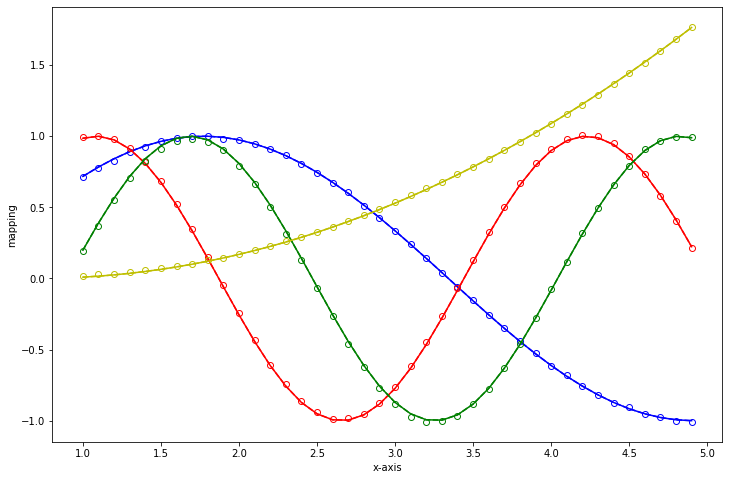

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,8))

index=10
start=.1*index
rangex=np.arange(start, start+4.0, 0.1)
plt.plot(rangex, X[index],'b-')
plt.plot(rangex, y[index],'b--')
plt.plot(rangex, layer2[index], 'bo',mfc='none')

plt.plot(rangex, X[index+1],'r-')
plt.plot(rangex, y[index+1],'r--')
plt.plot(rangex, layer2[index+1], 'ro',mfc='none')

plt.plot(rangex, X[index+2],'g-')
plt.plot(rangex, y[index+2],'g--')
plt.plot(rangex, layer2[index+2], 'go',mfc='none')

plt.plot(rangex, X[index+3],'y-')
plt.plot(rangex, y[index+3],'y--')
plt.plot(rangex, layer2[index+3], 'yo',mfc='none')


plt.xlabel('x-axis')
plt.ylabel('mapping')
plt.axis('tight')
plt.show()

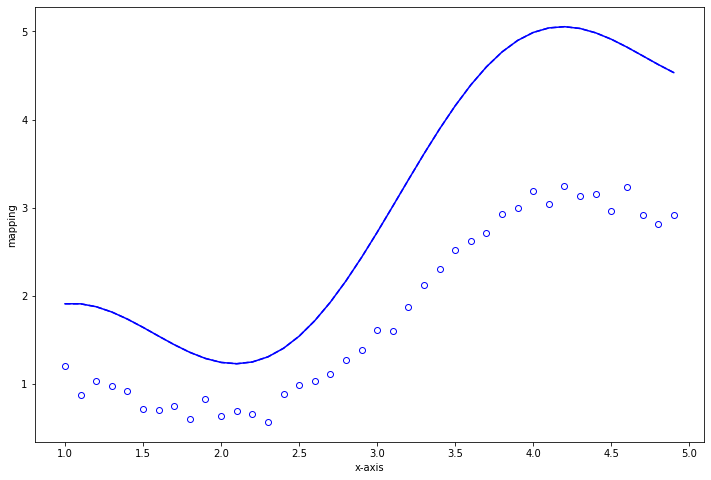

In [ ]:
rangex=np.arange(start, start+4.0, 0.1)


X_test= np.sin(2.0*rangex) + rangex
y_test=np.sin(2.0*rangex) + rangex


# Feed forward through layers 0, 1, and 2
layer0_test = X_test
layer1_test = nonlin2(np.dot(layer0_test,w0))
layer2_test = nonlin(np.dot(layer1_test,w1))


import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,8))

plt.plot(rangex, X_test,'b-')
plt.plot(rangex, y_test,'b--')
plt.plot(rangex, layer2_test, 'bo',mfc='none')


plt.xlabel('x-axis')
plt.ylabel('mapping')
plt.axis('tight')
plt.show()


###  Homework. Integrators (10 points, per SLT, no deadline yet): Train a system that can integrate the following functions simultaneously: $x$, $\sin(x )$, $x\cos(x)$. Plot the output for  $x + \sin(x)$

### <span style="color:green"> Break out Rooms. Discuss the above results per Learning Team. (12 mins) </span> 

# 3. Summary: 3 Heuristics or Rule of thumbs when training neural networks (NN) - A practioner perspective

1. **on Activation functions.** Activation functions are like filters. One must understand the properties and limits of these filters to properly capture the essential features needed for the NN to learn and generalize the mapping. Illustrations:

    A. If NN is used to classify or if the system is inherently thresholded, consider a threshold activation function like `sigmoid` or `tanh`.    
    B. If the system has inherent periodicity consider `sine` or `cosine`.    
    C. If the system requires floating point accuracy with values greater than 1.0, consider a linear output activation or ReLU if it is purely positive. If you decide to use the sigmoid function, scale it and make sure it can output values higher than 1.0 (say, use 3.0 sigmoid).     
    D. *Question: If the outputs require a negative number, what do you do?*          
       

2. **on Learning rates.** Properly choose the learning rate. Most articles in the literature set it at the same value (i.e., from .01 to .1). However, in hundreds of NN models I have implemented, my general heuristics is for the earlier layer (input to hidden weights) to have higher learning rates compared to the layers nearer the output (hidden to output weights). This is mathematically sensible since changes from hidden to output are propagated throughout the weight space and, hence, they can significantly impact the chance of the NN to diverge to +NAN. A more advanced strategy is to use adaptive learning rates or include a momentum term in the training that looks at the direction of the second derivatives. For additional reading, please refer to the DEEP LEARNING book of Yoshua Benigno and Ian Goodfellow, the creator of GANS.   
     
           
3. **on Hidden Nodes.**  Historically, the three-layer fully-connected feed-forward back-propagation NN is the most used architecture in the history of AI. For data with parameters less than 30 and samples up to just a few tens of thousands (say 10,000), the performance of a three-layer NN is comparable to the relatively more powerful newer architectures like CNN, LSTM. When the inputs and the number of samples scale up (like IMDB photo data where you have more than 500k sample faces and each sample is 100 x 100 image), then the three-layer architecture is not optimal and is insecure especially compared to CNN.  
     
*As we move forward you will learn more ways to improve the NN performance including pruning (dropout) the weights or pooling the results. For now, the above insights are powerful enough to be at far with the GBM results for medium size data (> 10,000, more than 20 features) rows but it requires more training. In general, GBM and other ensemble ML methods discussed in ML 1.0 is good enough for tabular data but not for large input, high volume data like images.*


**Finally, I want to reiterate my expectations. I expect every single graduate of MSDS program at AIM to know how this algorithm works and should be able to derive it — without notes, in public, under the most challenging crowd, and even under the influence of alcohol!** 

